# Training Model Examples

## Setup

In [15]:
import numpy as np
from sklearn import neighbors
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)

Xtr, Xval, Ytr, Yval = train_test_split(X, Y, test_size=0.2)

###X,Y = shuffle(X, Y)

'''
Xtr = X[:10000,:]
Ytr = Y[:10000]

Xval = X[10000:20000]
Yval = Y[10000:20000]
'''

'\nXtr = X[:10000,:]\nYtr = Y[:10000]\n\nXval = X[10000:20000]\nYval = Y[10000:20000]\n'

## K-Nearest Neighbors

In [ ]:
import matplotlib.pyplot as plt 

knnN = [1, 2, 3, 5, 10, 15, 20, 25, 30, 35, 40]
knnTrainingErrors = []
knnValidationErrors = []
for n in knnN:
    knnClassifier = neighbors.KNeighborsClassifier(n_neighbors=n, weights="distance", n_jobs=-1)
    knnClassifier.fit(Xtr, Ytr)

    Yhat = knnClassifier.predict_proba(Xval)[:,1]
    trE = 1 - knnClassifier.score(Xtr, Ytr)
    valE = 1 - knnClassifier.score(Xval, Yval)
    
ax.plot(knnN, knnTrainingErrors, label="Training Error")
ax.plot(knnN, knnValidationErrors, label="Validation Error")
ax.set_xlabel("Nearest Neighbors")
ax.set_ylabel("Error")
plt.show()

## Random Forest

In [23]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier(
    n_estimators=500, min_samples_leaf=5, n_jobs=-1, oob_score=True)

rfc.fit(Xtr, Ytr)

rfcRoc = metrics.roc_auc_score(Yval, rfc.predict_proba(Xval)[:,1])

print("ROC :", rfcRoc)
print("Training Error: ", 1 - rfc.score(Xtr, Ytr))
print("Validation Error: ", 1 - rfc.score(Xval, Yval))

ROC : 0.696520420545
Training Error:  0.1295
Validation Error:  0.3047


## Neural network

In [17]:
from sklearn import neural_network

hiddenNodes = [100,200,300,400,500,600,700,800,900,1000]

twoLayerErrorTrain = np.zeros(10)
twoLayerErrorValid = np.zeros(10)
threeLayerErrorTrain = np.zeros(10)
threeLayerErrorValid = np.zeros(10)

print( "2 Layers ")
for i,n in enumerate(hiddenNodes):
    twoLayerModel = neural_network.MLPClassifier(hidden_layer_sizes=(n,n))
    twoLayerModel.fit(Xtr, Ytr)
    twoLayerModelRoc = metrics.roc_auc_score(Yval, twoLayerModel.predict_proba(Xval)[:,1])
    errorTrain = 1 - twoLayerModel.score(Xtr, Ytr)
    errorValid = 1 - twoLayerModel.score(Xval, Yval)
    twoLayerErrorTrain[i] = errorTrain
    twoLayerErrorValid[i] = errorValid
    print("Hidden Nodes: " + str(n) + ", ROC :", twoLayerModelRoc, "Training error: ", errorTrain, "Validation error: ", errorValid)
    
print( "3 Layers ")
for i,n in enumerate(hiddenNodes):
    threeLayerModel = neural_network.MLPClassifier(hidden_layer_sizes=(n,n,n))
    threeLayerModel.fit(Xtr, Ytr)
    threeLayerModelRoc = metrics.roc_auc_score(Yval, threeLayerModel.predict_proba(Xval)[:,1])
    errorTrain = 1 - threeLayerModel.score(Xtr, Ytr)
    errorValid = 1 - threeLayerModel.score(Xval, Yval)
    threeLayerErrorTrain[i] = errorTrain
    threeLayerErrorValid[i] = errorValid
    print("Hidden Nodes: " + str(n) + ", ROC :", threeLayerModelRoc, "Training error: ", errorTrain,"Validation error: ", errorValid)

2 Layers 
('Hidden Nodes: 100, ROC :', 0.54092187127276425, 'Training error: ', 0.57820000000000005, 'Validation error: ', 0.58550000000000002)
('Hidden Nodes: 200, ROC :', 0.58012301599838056, 'Training error: ', 0.44769999999999999, 'Validation error: ', 0.44189999999999996)
('Hidden Nodes: 300, ROC :', 0.57995811413607923, 'Training error: ', 0.47130000000000005, 'Validation error: ', 0.47450000000000003)
('Hidden Nodes: 400, ROC :', 0.54030040259693413, 'Training error: ', 0.35829999999999995, 'Validation error: ', 0.36960000000000004)
('Hidden Nodes: 500, ROC :', 0.5963084874896255, 'Training error: ', 0.57679999999999998, 'Validation error: ', 0.56810000000000005)
('Hidden Nodes: 600, ROC :', 0.60488946983633851, 'Training error: ', 0.34930000000000005, 'Validation error: ', 0.34699999999999998)
('Hidden Nodes: 700, ROC :', 0.52866818656415826, 'Training error: ', 0.33279999999999998, 'Validation error: ', 0.34040000000000004)
('Hidden Nodes: 800, ROC :', 0.62594101821122039, 'Tr

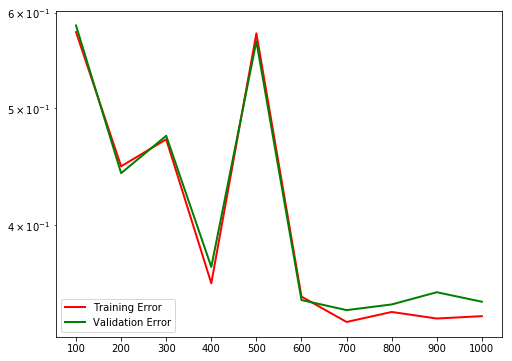

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.semilogy(hiddenNodes,twoLayerErrorTrain,'r-',hiddenNodes,twoLayerErrorValid,'g-',linewidth=2);

plt.xticks(hiddenNodes)
plt.legend(['Training Error','Validation Error'],loc='lower left');
plt.show()

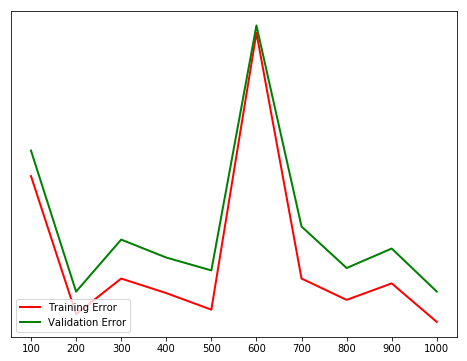

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.semilogy(hiddenNodes,threeLayerErrorTrain,'r-',hiddenNodes,threeLayerErrorValid,'g-',linewidth=2);

plt.xticks(hiddenNodes)
plt.legend(['Training Error','Validation Error'],loc='lower left');
plt.show()

## Naive Bayes

In [ ]:
from sklearn import naive_bayes

nbgc = naive_bayes.GaussianNB()
nbgc.fit(X, Y)
nbgRoc = metrics.roc_auc_score(Yval, nbgc.predict_proba(Xval)[:,1])

print("ROC :", nbgRoc)
print("Training Error: ", 1 - nbgc.score(Xtr, Ytr))
print("Validation Error: ", 1 - nbgc.score(Xval, Yval))

In [28]:
from sklearn import neural_network
from sklearn import ensemble
from sklearn import neighbors
from sklearn.ensemble import BaggingRegressor
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

print( "$" )
bestKnn = neighbors.KNeighborsClassifier(n_neighbors=20, weights="distance", n_jobs=-1)
print( "$" )
bestNN = neural_network.MLPClassifier(hidden_layer_sizes=(1000,1000,1000))
print( "$" )
bestRFC = ensemble.RandomForestClassifier(
    n_estimators=500, min_samples_leaf=1, n_jobs=-1, oob_score=True, max_depth=16)


#bestKnn.fit(Xtr, Ytr)
#bestNN.fit(Xtr, Ytr)
#bestRFC.fit(Xtr, Ytr)

#print(Ytr.shape)

#estimators = []
#knnP = bestKnn.predict(Xtr)

#print(knnP.shape)
#knnMSE = mean_squared_error(Ytr, knnP)
#estimators.append(bestNN)
#estimators.append(bestRFC.predict())

#print( knnMSE )


ensemble = [None]*3
ensemble[0] = bestKnn
ensemble[1] = bestNN
ensemble[2] = bestRFC

print( "$" )
bagReg = BaggingRegressor(n_estimators=3)
print( "$" )
bagReg.estimators_ = ensemble
print( "$" )
yhatTr = bagReg.fit(Xtr,Ytr).predict(Xtr)
print( "$" )
yhatVa = bagReg.fit(Xval,Yval).predict(Xval)
print( "$" )

print( np.mean((Ytr - yhatTr)**2), np.mean((Yval - yhatVa)**2))

ensembleRoc = metrics.roc_auc_score(Yval, bagReg.predict(Xval))
print( ensembleRoc )

Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
Yte = np.vstack((np.arange(Xte.shape[0]), bagReg.predict(Xte))).T

# Output a file with two columns, a row ID and a confidence in class 1:
#np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')

$
$
$
$
$
$
$
$
(0.074904913643078913, 0.068827328667737844)
0.963259478361
